# 시계열 분석
- 시계열 : 시간의 흐름 , 시간의 흐름을 바꾸면 문제발생 할 수도 있음
- 모델링 진행 할 때도 시계열 데이터는 섞을 수 없다. 
- pandas 에서 제공하는 datetime, TimeStamp, Timedelta 활용 가능

    

# datetime
- date + time
- date : 연, 월, 일로 이루어졌고
- time : 시간, 분, 초, 마이크로초로 이뤄졌다.
# Timestamp
- 날짜와 시간 모두 가지고 있는 단일객체
# timedelta
- 객체를 가지고 있는데 시계열 데이터를 덧셈 또는 뺄셈도 가능

In [1]:
import pandas as pd
import datetime
date = datetime.date(year = 2023, month = 5, day=21)
time = datetime.time(hour = 22, minute = 6, second = 5, microsecond = 1234)

In [2]:
print(date)
print(time)

2023-05-21
22:06:05.001234


In [3]:
dt = datetime.datetime(year= 2023, month = 5, day= 21, hour = 22, minute = 6, second = 5, microsecond = 1234)
print(dt)

2023-05-21 22:06:05.001234


In [6]:
# timedelta는 계산이 가능하다
td = datetime.timedelta(days = 20, hours= 10)
print(td)
print(date +td)
print(dt + td)

20 days, 10:00:00
2023-06-10
2023-06-11 08:06:05.001234


In [7]:
# datetime의 좋은 점 : datetime을 이용해서 시계열 데이터로 바꾼다. 
pd.to_datetime('2023-5-21')

Timestamp('2023-05-21 00:00:00')

In [11]:
a = pd.Series(['2023-5-21','21/5/2023','2023-6-21','2023-07-19','2023-05-32'])
# 에러의 경우 정상적이지 않은 시계열 값은 na 반환
# datetime이 반환해주는 형태가 있다.
# 이 형태는 연도,월,일 잘 매핑 해주고, 잘못된 월같은 경우는 na 반환
# 연도-월-일 : datetime이 잘 인식하는 형태
pd.to_datetime(a, dayfirst = True, errors = 'coerce')

0   2023-05-21
1   2023-05-21
2   2023-06-21
3   2023-07-19
4          NaT
dtype: datetime64[ns]

## 실제 데이터 활용 (crime.csv)


In [14]:
crime = pd.read_csv("crime.csv")
crime
# reported_date 칼럼이 시계열 칼럼

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [15]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [25]:
# 해당 칼럼 datetime 칼럼으로 바꾸기 
crime['REPORTED_DATE']=pd.to_datetime(crime['REPORTED_DATE'])

In [23]:
# 해당 시계열 데이터 컬럼을 인덱스로 지정
crime_df = crime.set_index ('REPORTED_DATE')
crime_df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [24]:
# 시계열 데이터 컬럼을 인덱스로 지정하면 좋은 점
# 1. 다양한 메서드를 사용 할 수 있다. 
crime_df.loc['2017-09']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-09-17 02:13:00,89011,aggravated-assault,aggravated-assault,-104.990480,39.728076,lincoln-park,1,0
2017-09-18 13:30:00,112711,criminal-mischief-mtr-veh,public-disorder,-104.989896,39.753590,five-points,1,0
2017-09-12 15:59:00,134270,traffic-accident,traffic-accident,-104.940906,39.742085,city-park,0,1
2017-09-26 21:17:00,191519,traf-other,all-other-crimes,-105.008656,39.711201,athmar-park,1,0
2017-09-10 11:30:00,193934,aggravated-assault,aggravated-assault,-105.049447,39.700059,westwood,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


In [27]:
#추가로 요일을 더 지정할 수 있다.
crime_df.loc['2017-09-13']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2017-09-13 13:06:00,451665,fraud-identity-theft,white-collar-crime,-105.007308,39.788123,chaffee-park,1,0
2017-09-13 11:12:00,452119,theft-other,larceny,-104.910155,39.740532,south-park-hill,1,0
2017-09-13 16:00:00,453375,traffic-accident,traffic-accident,-104.913986,39.743406,south-park-hill,0,1
2017-09-13 11:50:00,453519,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.886145,39.738479,east-colfax,1,0
2017-09-13 13:05:00,453935,theft-parts-from-vehicle,theft-from-motor-vehicle,-105.025060,39.678635,harvey-park,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 02:21:00,460867,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0
2017-09-13 03:21:00,460879,traffic-accident-dui-duid,traffic-accident,-105.010711,39.757385,highland,0,1
2017-09-13 02:15:00,460889,traffic-accident-hit-and-run,traffic-accident,-105.043950,39.787436,regis,0,1


In [28]:
crime_df.loc['Dec 2014']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-12-19 17:42:00,1219,traffic-accident,traffic-accident,-104.940355,39.781688,northeast-park-hill,0,1
2014-12-06 08:25:00,1225,disturbing-the-peace,public-disorder,-104.817529,39.773653,montbello,1,0
2014-12-19 08:29:00,1301,burglary-residence-no-force,burglary,-104.901114,39.729047,lowry-field,1,0
2014-12-01 22:13:00,1322,liquor-possession,drug-alcohol,-104.966870,39.738576,cheesman-park,1,0
2014-12-30 08:26:00,1341,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037817,39.771111,berkeley,1,0
...,...,...,...,...,...,...,...,...
2014-12-18 22:36:00,377801,criminal-trespassing,all-other-crimes,-104.999197,39.739042,lincoln-park,1,0
2014-12-10 19:35:00,377834,assault-simple,other-crimes-against-persons,-105.033088,39.706098,westwood,1,0
2014-12-16 13:51:00,379049,assault-simple,other-crimes-against-persons,-104.921734,39.753780,north-park-hill,1,0


In [29]:
crime_df.loc['2014'].sort_index()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 00:08:00,99814,traf-other,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:08:00,214696,traf-habitual-offender,all-other-crimes,-104.841945,39.773764,stapleton,1,0
2014-01-01 00:38:00,224109,theft-of-motor-vehicle,auto-theft,-104.890345,39.782623,stapleton,1,0
2014-01-01 00:39:00,83972,robbery-street,robbery,-104.979260,39.753859,five-points,1,0
2014-01-01 01:00:00,236308,aggravated-assault,aggravated-assault,-105.048852,39.731369,villa-park,1,0
...,...,...,...,...,...,...,...,...
2014-12-31 23:59:00,226091,weapon-carrying-concealed,all-other-crimes,-105.017647,39.718170,valverde,1,0
2014-12-31 23:59:00,148309,traffic-accident,traffic-accident,-105.040484,39.751199,sloan-lake,0,1
2014-12-31 23:59:00,97411,assault-dv,other-crimes-against-persons,-105.017647,39.718170,valverde,1,0


# Between_time

In [30]:
crime_df14 = crime_df.loc['2014'].sort_index()
crime_df14.between_time('13:00', '17:00')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-01 13:08:00,1251,traffic-accident,traffic-accident,-104.912616,39.651368,hampden-south,0,1
2014-01-01 13:54:00,146990,burglary-residence-no-force,burglary,-104.977279,39.694618,washington-park-west,1,0
2014-01-01 13:55:00,200314,burglary-business-by-force,burglary,-105.022611,39.792059,chaffee-park,1,0
2014-01-01 14:22:00,133765,liquor-possession,drug-alcohol,-104.973097,39.740032,capitol-hill,1,0
2014-01-01 14:28:00,137563,assault-dv,other-crimes-against-persons,-105.018501,39.782714,sunnyside,1,0
...,...,...,...,...,...,...,...,...
2014-12-31 16:24:00,86655,traffic-accident-hit-and-run,traffic-accident,-104.991275,39.708686,baker,0,1
2014-12-31 16:29:00,176283,theft-of-motor-vehicle,auto-theft,-104.919065,39.760460,north-park-hill,1,0
2014-12-31 16:49:00,160505,failure-to-appear,all-other-crimes,-104.991248,39.709848,baker,1,0


# at_time : 정각시간에 대한 데이터

In [32]:
crime_df14.at_time('16:49')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-01-08 16:49:00,201010,traffic-accident,traffic-accident,-104.851718,39.768331,stapleton,0,1
2014-01-18 16:49:00,159782,traffic-accident,traffic-accident,-105.053239,39.733105,villa-park,0,1
2014-01-18 16:49:00,292755,theft-other,larceny,-105.004929,39.710900,athmar-park,1,0
2014-01-28 16:49:00,153133,traffic-accident,traffic-accident,-104.994952,39.765683,globeville,0,1
2014-02-04 16:49:00,229613,traffic-accident,traffic-accident,-104.884606,39.657791,hampden,0,1
...,...,...,...,...,...,...,...,...
2014-12-02 16:49:00,245051,theft-other,larceny,-104.999293,39.752085,union-station,1,0
2014-12-14 16:49:00,217437,burglary-business-by-force,burglary,-104.975748,39.740222,north-capitol-hill,1,0
2014-12-16 16:49:00,129733,theft-items-from-vehicle,theft-from-motor-vehicle,-105.025552,39.731396,villa-park,1,0


In [35]:
# resample :  Datetime Index를 원하는 주기로 나누어주는 메서드
crime_sp14=crime_df14[['IS_CRIME','IS_TRAFFIC']]
crime_sp=crime_df14[['IS_CRIME']]

In [40]:
# 월별, 일별, 주별 값을 계산
crime_spw = crime_sp.resample('W').sum()
crime_sp14 .resample('W').sum()


,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-01-05,619,268
2014-01-12,1023,397
2014-01-19,1102,327
2014-01-26,1082,351
2014-02-02,917,439
2014-02-09,948,481
2014-02-16,1258,394
2014-02-23,1315,358
2014-03-02,1151,404


In [41]:
crime_sp14.resample('Y').sum()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2014-12-31,62690,21763


<Axes: xlabel='REPORTED_DATE'>

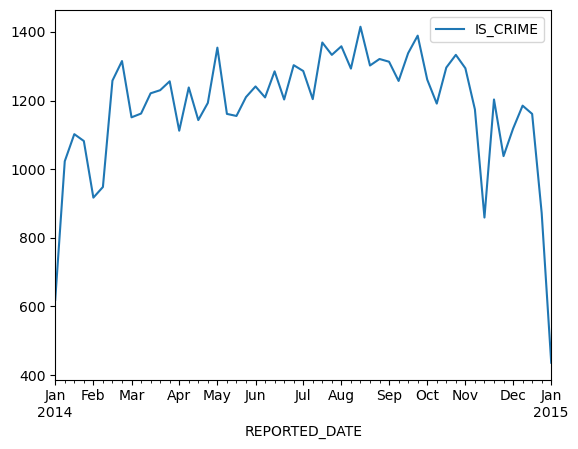

In [42]:
crime_spw.plot()